# LoanTap Business Case

# Problem Statement

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

1. Personal Loan
2. EMI Free Loan
3. Personal Overdraft
4. Advance Salary Loan
But the main focus is to interpret the underwriting process behind the Personal Loan only

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

- Additional views
    - We need to track the users previous credit line history and repayment status.
    - Analysing the previous loans tenure and the total liability.
    - As we are focusing more on salaried individual, we need to take salary of the person into consideration.

# Installing Dependencies

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

# Loading Dataset

In [233]:
loantap = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921')

loantap.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [234]:
print(f"The dataset has {loantap.shape[0]} rows and {loantap.shape[1]} columns")

The dataset has 396030 rows and 27 columns


In [235]:
loantap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [236]:
loantap.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [237]:
loantap.duplicated().sum()

0

**`Insights`**
- Dataset has no duplicate values

In [238]:
loantap.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**Instights**
- We have bunch of missing value attributes. 

In [239]:
loantap.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


**Insights**
- There is significant difference found in the mean and median of the following attributes
    - loan_amnt
    - terms
    - installment
    - revol_bal etc.
- These attributes might contain outliers

In [240]:
loantap.describe(include = 'object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


**Insights**
- Most of the loan disburesed for the 36 months period
- Most of the loan applicant have mortgage the home
- Majority of loans been fully paid off
- Majorily the loans been disbursed for the purpose of debt consolidation
- Most of the applicant is Individual

# Visualization - Univariate Analysis

In [241]:
num_vars = loantap.select_dtypes('float64').columns.tolist()

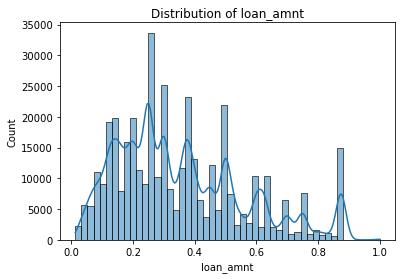

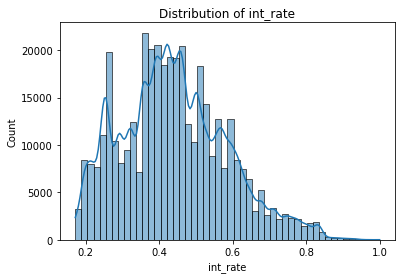

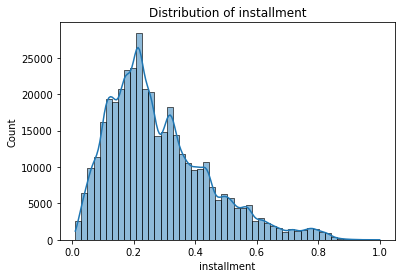

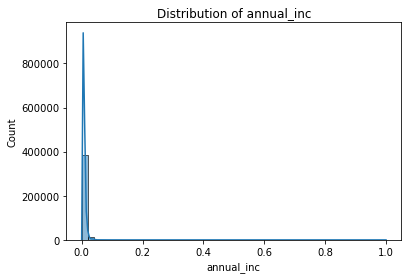

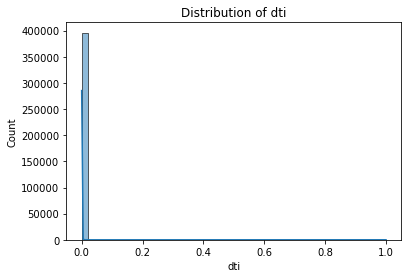

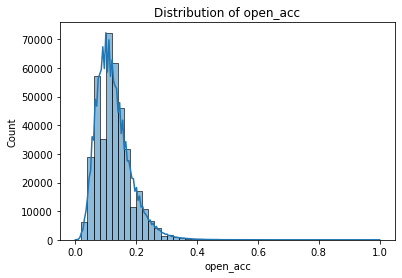

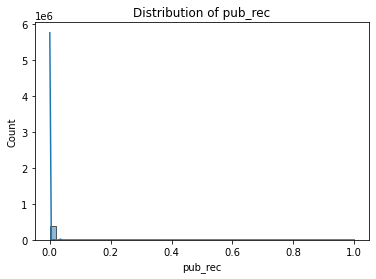

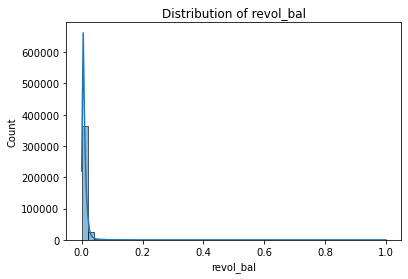

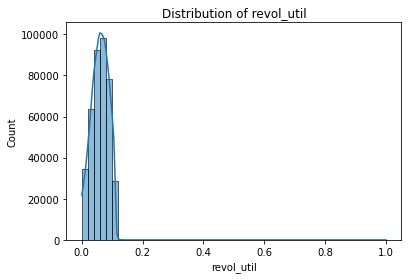

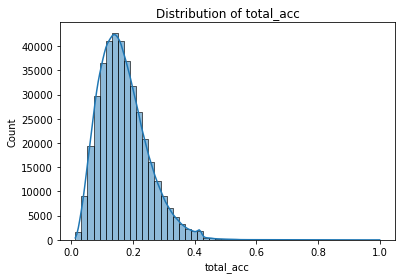

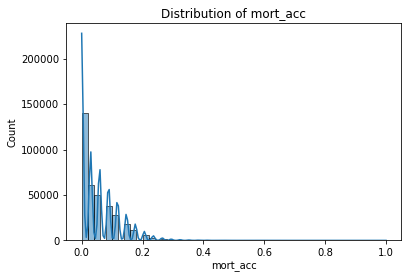

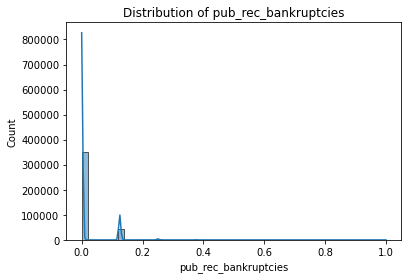

In [242]:
for i in num_vars:
#     plt.figure(figsize=(12,5))
    plt.title("Distribution of {}".format(i))
    sns.histplot(loantap[i]/loantap[i].max(), kde=True, bins=50)
    plt.show()

**Insights**
- Most of the distribution is highly skewed which tells us that they might contain outliers
- Almost all the continuous features have outliers present in the dataset.

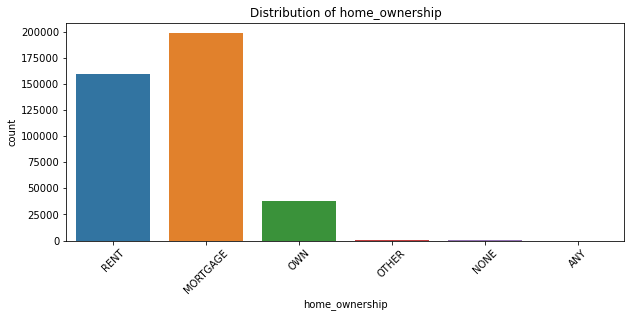

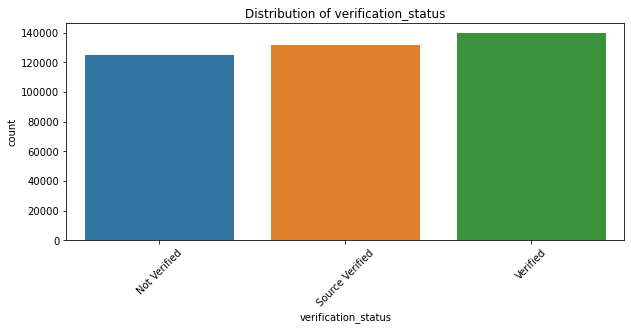

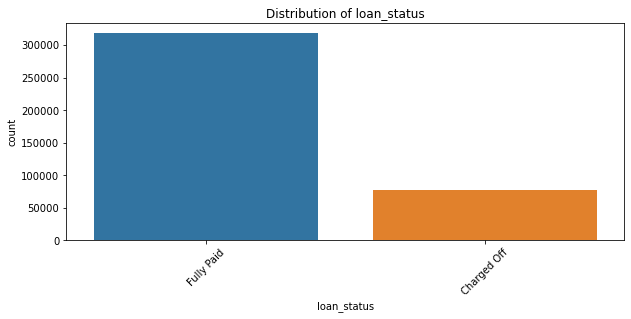

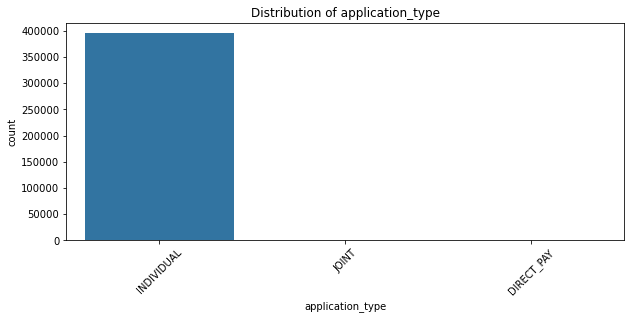

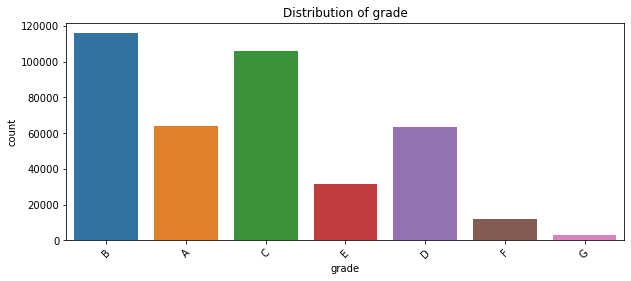

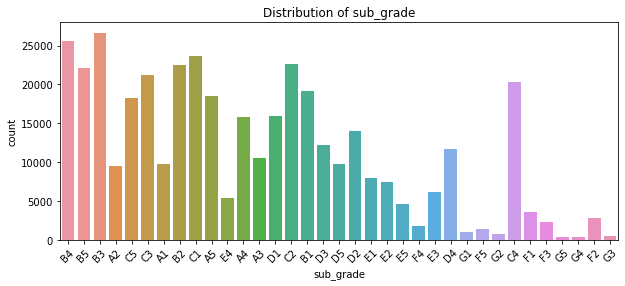

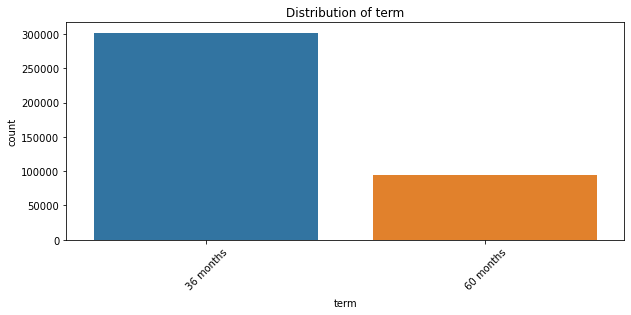

In [248]:
cat_vars = ['home_ownership', 'verification_status', 'loan_status', 'application_type', 'grade', 'sub_grade', 'term']
for i in cat_vars: 
    plt.figure(figsize=(10, 4))
    plt.title(f'Distribution of {i}')
    sns.countplot(data=loantap, x=i)
    plt.xticks(rotation = 45)
    plt.show()

**Insights**
- All the application type is Individual
- Most of the loan tenure is disbursed for 36 months
- The grade of majority of people those who have took the loan is 'B' and have subgrade 'B3'.
- So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

# Visualization - Bivariate Analysis

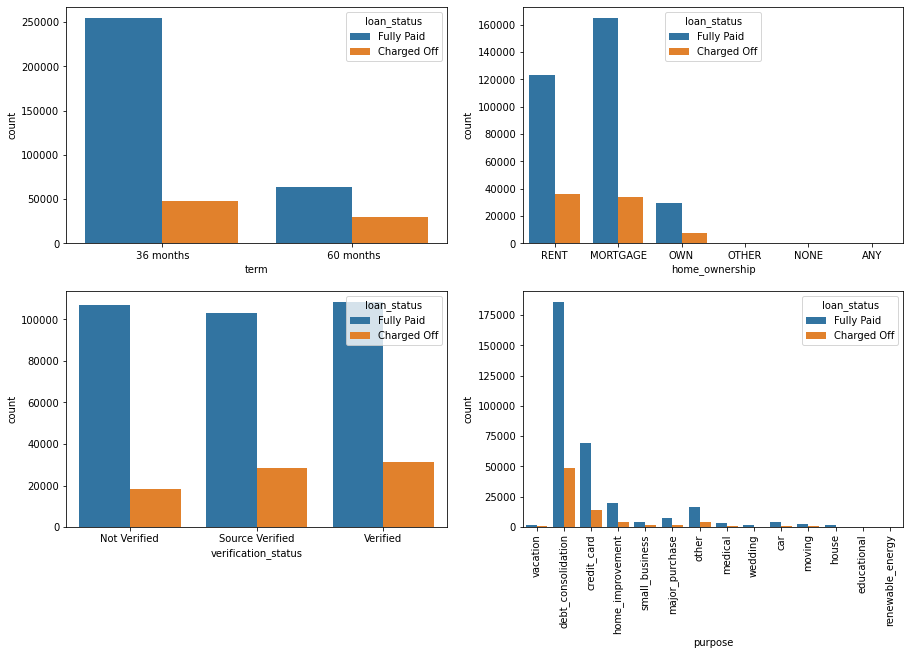

In [192]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='term',data=loantap,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data=loantap,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data=loantap,hue='loan_status')

plt.subplot(4,2,4)
g=sns.countplot(x='purpose',data=loantap,hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

**Insights**
- Most of the people took loan for 36 months and full paid on time
- Most of people have home ownership as mortgage and rent
- Most of the people took loan for debt consolidations

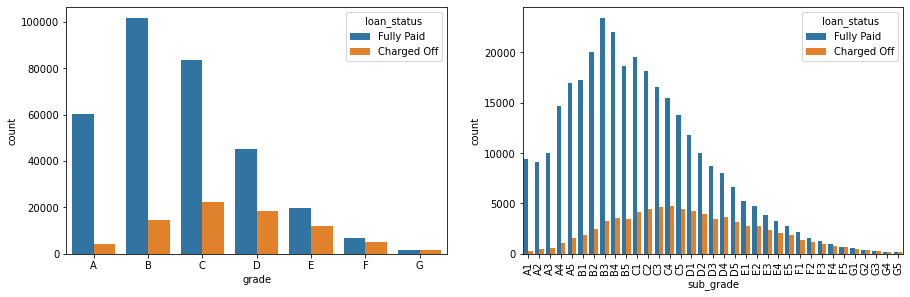

In [193]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(loantap.grade.unique().tolist())
sns.countplot(x='grade', data=loantap, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(loantap.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=loantap, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

**Insights**
- The grade of majority of people those who have fully paid the loan is 'B' and have subgrade 'B3'.

- So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

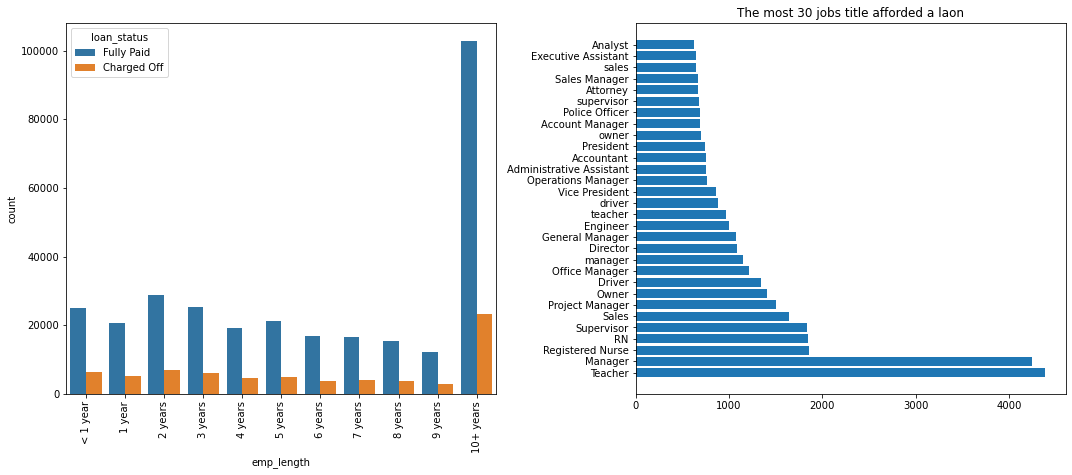

In [194]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g=sns.countplot(x='emp_length',data=loantap,hue='loan_status',order=order)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(2,2,2)
plt.barh(loantap.emp_title.value_counts()[:30].index,loantap.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a laon")
plt.tight_layout()

plt.show()

**Insights**
- Manager and Teacher are the most afforded loan on titles
- Person who employed for more than 10 years has successfully paid of the loan

# Correlation Analysis

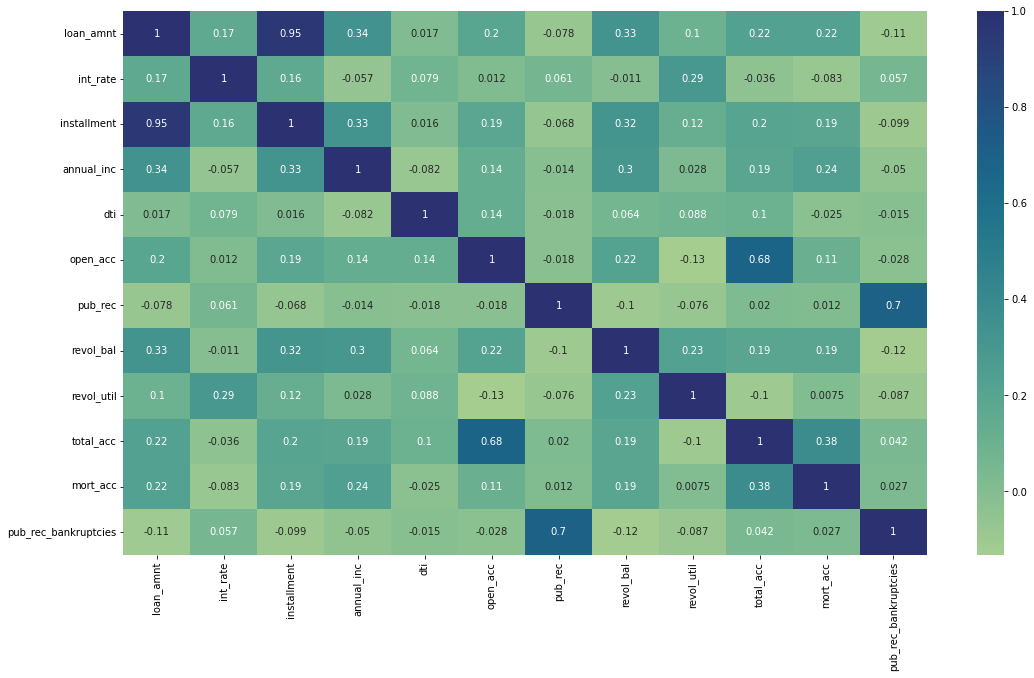

In [195]:
plt.figure(figsize=(18,10))
sns.heatmap(loantap.corr(), cmap = 'crest', annot = True)

plt.show()

**Insights**

- We noticed almost perfect correlation between "loan_amnt" the "installment" feature.

- installment: The monthly payment owed by the borrower if the loan originates.
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**Action**
- So, we can drop either one of those columns.

In [251]:
data.drop(columns=['installment'],axis=1,inplace=True)

# Data Preprocessing

# Feature Engineering

In [255]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [256]:
loantap['pub_rec']=loantap.pub_rec.apply(pub_rec)
loantap['mort_acc']=loantap.mort_acc.apply(mort_acc)
loantap['pub_rec_bankruptcies']=loantap.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

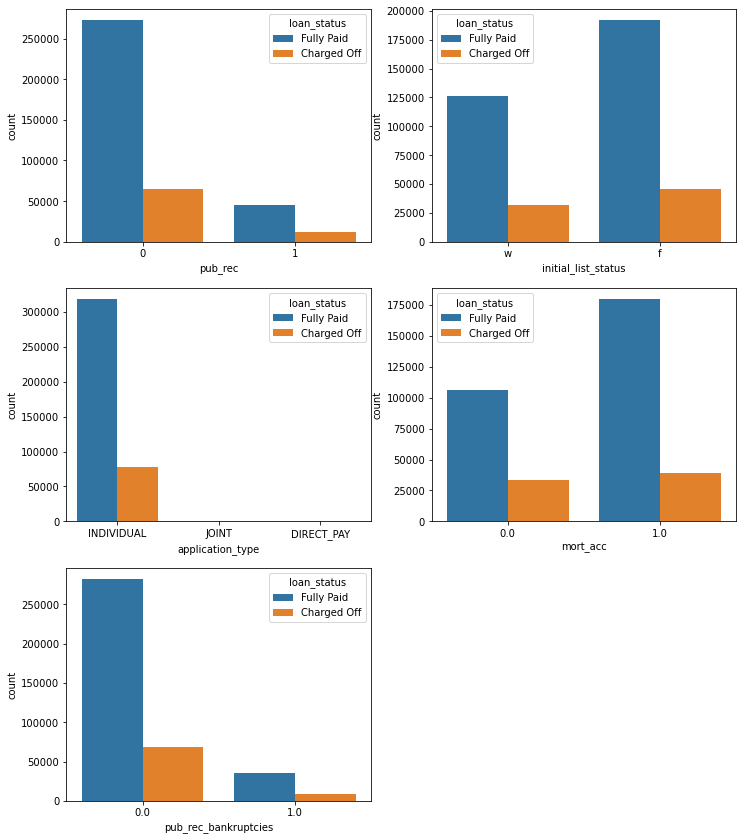

In [257]:
plt.figure(figsize=(12,30))

plt.subplot(6,2,1)
sns.countplot(x='pub_rec',data=loantap,hue='loan_status')

plt.subplot(6,2,2)
sns.countplot(x='initial_list_status',data=loantap,hue='loan_status')

plt.subplot(6,2,3)
sns.countplot(x='application_type',data=loantap,hue='loan_status')

plt.subplot(6,2,4)
sns.countplot(x='mort_acc',data=loantap,hue='loan_status')

plt.subplot(6,2,5)
sns.countplot(x='pub_rec_bankruptcies',data=loantap,hue='loan_status')

plt.show()

**Insights**
- Most the loan disbursed to the people whose do not hold bankrupties record have successfully paid loan

# Duplicate Value Check

In [258]:
loantap.duplicated().sum()

0

# Missing Value

In [259]:
loantap.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

# Missing Value Treatment

In [260]:
loantap.groupby(by='total_acc').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies
total_acc,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.033639,3382.807339,49.991022,0.046243,0.015480
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.033118,4874.231826,58.477400,0.062140,0.019672
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.055720,5475.253452,56.890311,0.090789,0.039187
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.076634,6546.374957,57.812483,0.121983,0.050947
7.0,9350.283611,14.415810,301.320234,50623.501002,11.829829,5.093169,0.087618,7363.941588,56.787540,0.171014,0.059423
8.0,9788.345760,14.271851,314.772509,52571.393657,12.684623,5.576887,0.108481,7850.161603,57.348173,0.219463,0.076995
9.0,10042.600597,14.244870,321.595479,52572.312693,13.296349,6.028765,0.121031,8205.770041,56.583065,0.250373,0.088472
10.0,10487.255605,14.109811,334.611747,55751.004093,14.004592,6.466111,0.121741,9124.531283,57.029202,0.275148,0.089615


In [261]:
total_acc_avg=loantap.groupby(by='total_acc').mean().mort_acc
# saving mean of mort_acc according to total_acc_avg
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc
loantap['mort_acc']=loantap.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [262]:
loantap.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
dtype: int64

**Insights**
- Dataset is very large so we can drop the rows with null values

In [263]:
# Dropping rows with null values
loantap.dropna(inplace=True)
# Remaining no. of rows
loantap.shape

(370622, 27)

# Outlier Detection

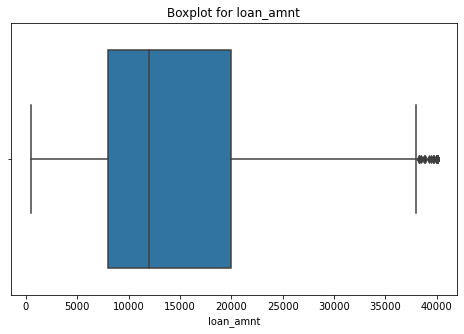

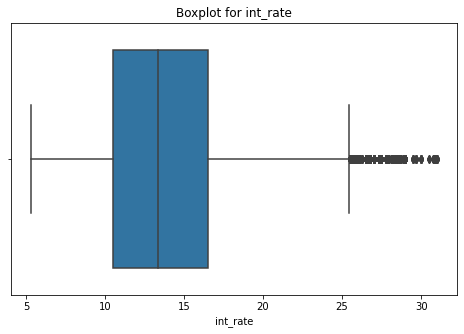

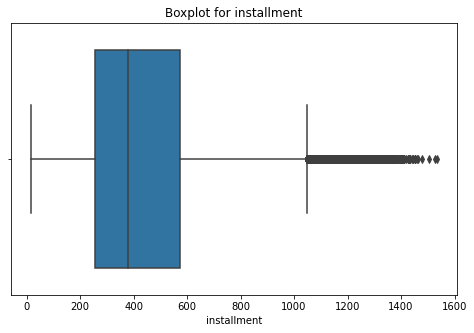

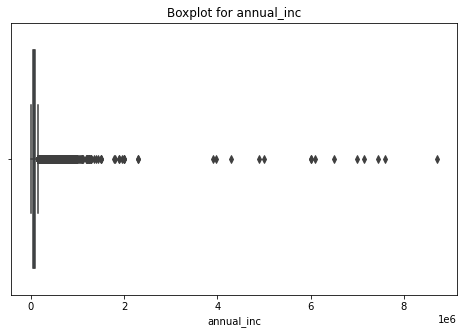

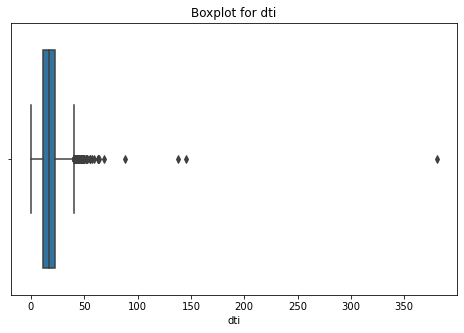

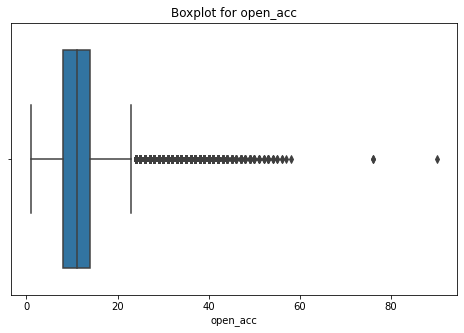

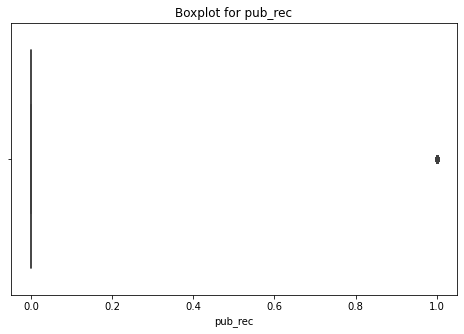

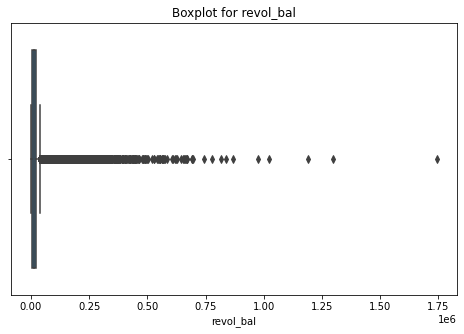

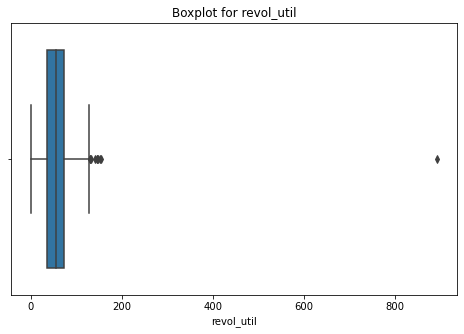

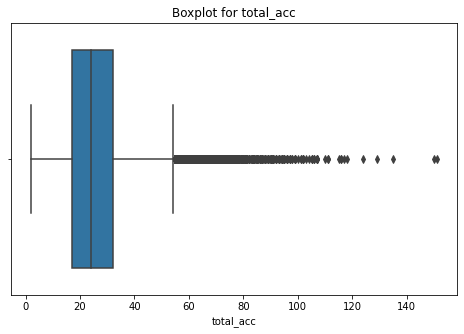

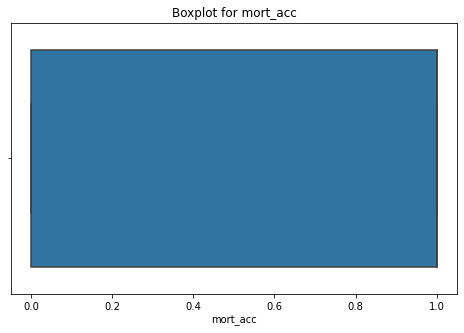

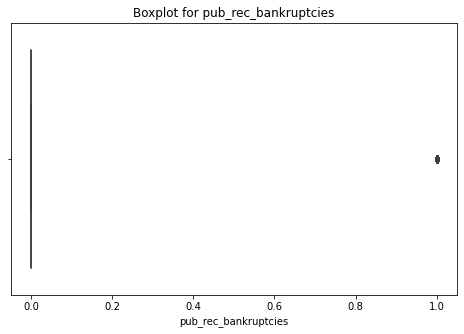

In [264]:
def box_plot(col):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=loantap[col])
    plt.title('Boxplot for {}'.format(col))
    plt.show()
    
for col in num_vars:
    box_plot(col)

# Outlier Treatment

In [265]:
for col in num_vars:
    mean=loantap[col].mean()
    std=loantap[col].std()
    
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    
    loantap=loantap[(loantap[col]<upper_limit) & (loantap[col]>lower_limit)]
    
loantap.shape

(350358, 27)

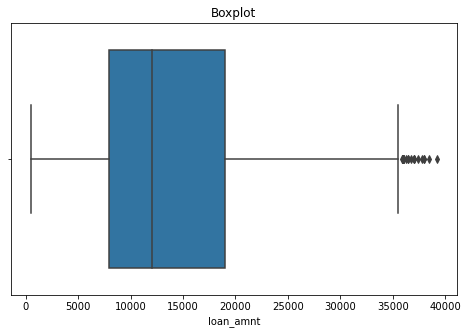

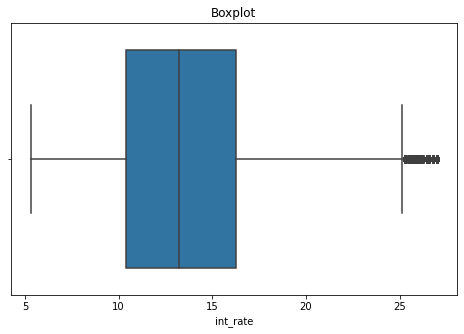

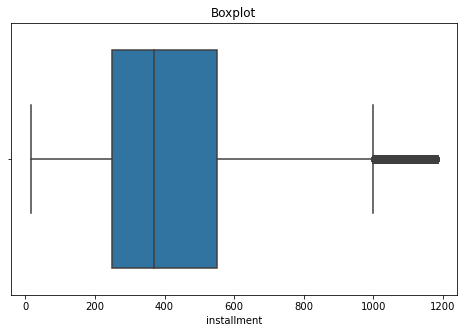

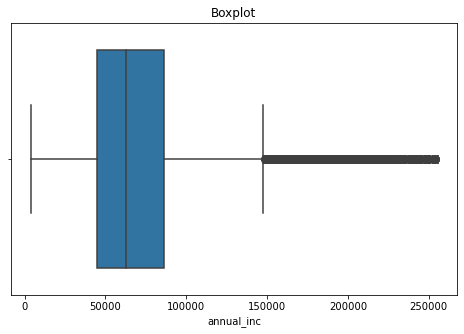

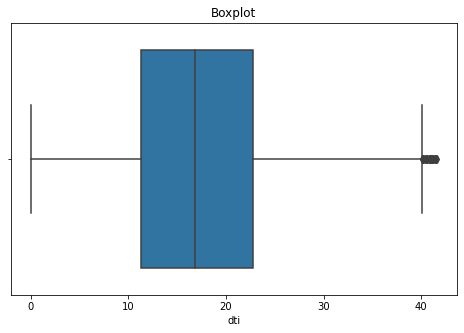

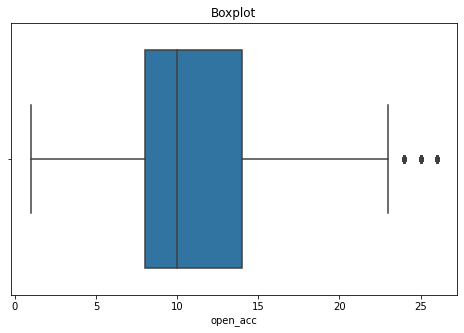

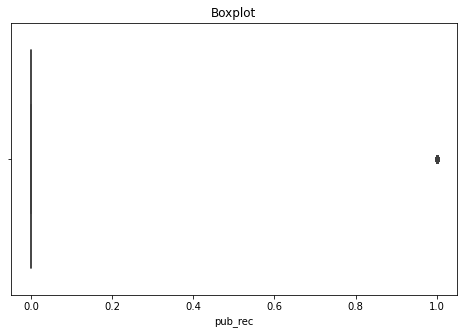

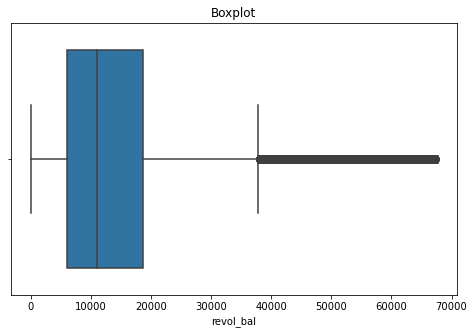

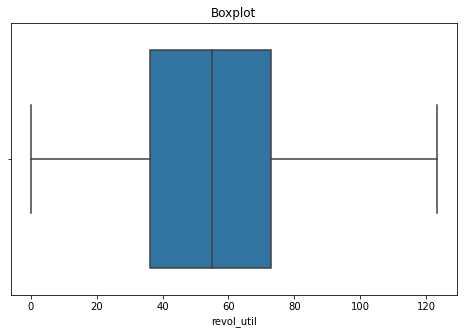

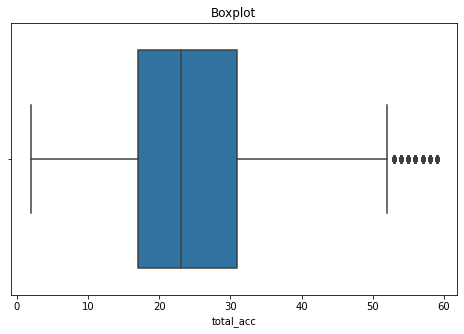

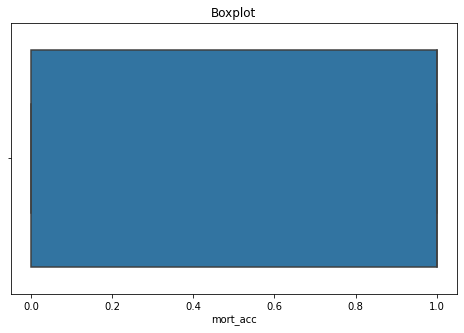

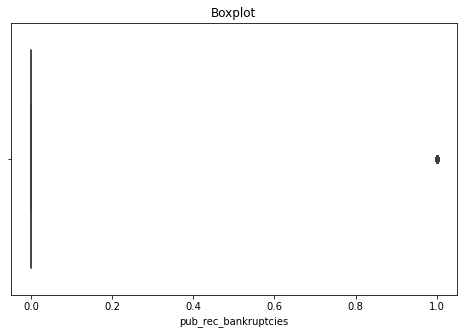

In [266]:
def box_plot(col):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=loantap[col])
    plt.title('Boxplot')
    plt.show()
    
for col in num_vars:
    box_plot(col)

In [267]:
# Converting term values to numerical val
term_values={' 36 months': 36, ' 60 months':60}
loantap['term'] = loantap.term.map(term_values)

# Mapping the target variable
loantap['loan_status']=loantap.loan_status.map({'Fully Paid':0, 'Charged Off':1})

# Initial List Status
loantap['initial_list_status'].unique()
np.array(['w', 'f'], dtype=object)
list_status = {'w': 0, 'f': 1}
loantap['initial_list_status'] = loantap.initial_list_status.map(list_status)

# Let's fetch ZIP from address and then drop the remaining details -
loantap['zip_code'] = loantap.address.apply(lambda x: x[-5:])
loantap['zip_code'].value_counts(normalize=True)*100

70466    14.375296
30723    14.289669
22690    14.272259
48052    14.126979
00813    11.605558
29597    11.549044
05113    11.519075
93700     2.768597
11650     2.762888
86630     2.730636
Name: zip_code, dtype: float64

In [268]:
# Dropping some variables which we can let go for now 
loantap.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'], 
                   axis=1, inplace=True)

# One hot encoding

In [269]:
dummies=['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']
data=pd.get_dummies(loantap,columns=dummies,drop_first=True)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Data processing for modelling

In [270]:
from sklearn.model_selection import train_test_split

X=data.drop('loan_status',axis=1)
y=data['loan_status']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)
print(X_train.shape)
print(X_test.shape)

(245250, 51)
(105108, 51)


In [271]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [272]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [273]:
# X.columns.shape
# # logreg.coef_[0]
pd.Series((zip(X.columns, logreg.coef_[0])))

0                     (loan_amnt, -0.14356459964004828)
1                            (term, 0.5389302062853516)
2                       (int_rate, 0.10172820951150907)
3                     (installment, 0.6706557163327765)
4                     (annual_inc, -1.1264337642098299)
5                             (dti, 1.0067797317649039)
6                        (open_acc, 0.7678516471957975)
7                         (pub_rec, 0.1993203792746295)
8                     (revol_bal, -0.49158538696898174)
9                     (revol_util, 0.46896593976659967)
10                     (total_acc, -0.6106469406833719)
11         (initial_list_status, -0.019547846656039085)
12                    (mort_acc, -0.060255365784687036)
13         (pub_rec_bankruptcies, -0.16521148949218148)
14           (purpose_credit_card, 0.19113889623686453)
15     (purpose_debt_consolidation, 0.2717077616352504)
16            (purpose_educational, 0.4831152902862432)
17        (purpose_home_improvement, 0.349891580

In [274]:
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.891


# Confusion Matrix

[[84387   528]
 [10888  9305]]


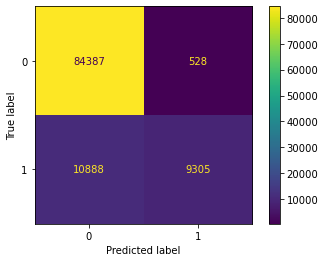

In [276]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=logreg.classes_).plot()

**Insights**
- There is significant value for false negative and false positive. Which will hamper our prediction due to type-1 or type-2 error.

# Classification Report

In [277]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     84915
           1       0.95      0.46      0.62     20193

    accuracy                           0.89    105108
   macro avg       0.92      0.73      0.78    105108
weighted avg       0.90      0.89      0.88    105108



**Insights**
- Precision score and recall score for full paid status is almost same indicates that model is doing decent job which correctly classified the both of the scenarios
- Precision score for charged off status is more than recall score which is perfect

# ROC / AUC 

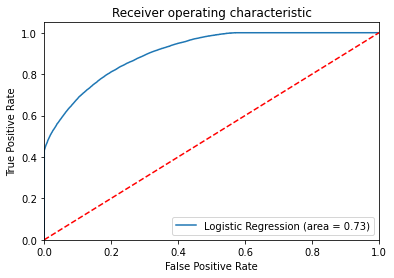

In [219]:
logit_roc_auc=roc_auc_score(y_test,logreg.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Insights**
- `ROC-AUC` curve is grossing the area near about 0.73 which indicates that model is performing well. 
- There is still room for some model improvement
- By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.

# Precision-Recall Curve

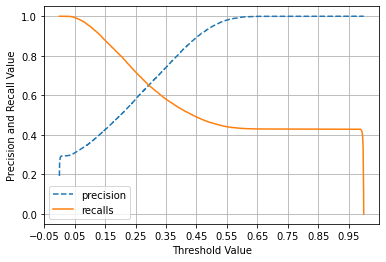

In [220]:
def precission_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    threshold_boundary = thresholds.shape[0]
    #plot precision
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    #plot recall
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recalls')
    
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precission_recall_curve_plot(y_test,logreg.predict_proba(X_test)[:,1])

**Insights**
- Precision score is highest at 0.55 threshold. High precision value indicates that model is positevly predicating the charged off loan status which helps business to take more stable decision.
- Recall score is higher on smaller threshold but after 0.55 the recall value is constant. Model is correctly classifying the actual predicated values as instances.

# Assumption of Log. Reg. (Multicollinearity Check)

In [41]:
def calc_vif(X):
    # Calculating the VIF
    vif=pd.DataFrame()
    vif['Feature']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

calc_vif(X)[:5]

,Feature,VIF
44,application_type_INDIVIDUAL,5012.25
46,home_ownership_MORTGAGE,2576.84
50,home_ownership_RENT,2172.79
49,home_ownership_OWN,468.51
0,loan_amnt,241.19


In [42]:
X.drop(columns=['application_type_INDIVIDUAL'],axis=1,inplace=True)
calc_vif(X)[:5]

,Feature,VIF
0,loan_amnt,241.19
3,installment,217.64
2,int_rate,130.35
1,term,126.76
45,home_ownership_MORTGAGE,102.91


In [43]:
X.drop(columns=['loan_amnt'],axis=1,inplace=True)
calc_vif(X)[:5]

,Feature,VIF
1,int_rate,123.55
44,home_ownership_MORTGAGE,78.86
48,home_ownership_RENT,63.78
14,purpose_debt_consolidation,51.20
0,term,25.86


In [44]:
X.drop(columns=['int_rate'],axis=1,inplace=True)
calc_vif(X)[:5]

,Feature,VIF
43,home_ownership_MORTGAGE,66.11
47,home_ownership_RENT,53.10
13,purpose_debt_consolidation,51.20
0,term,25.78
12,purpose_credit_card,18.62


In [45]:
X.drop(columns=['home_ownership_MORTGAGE'],axis=1,inplace=True)
calc_vif(X)[:5]

,Feature,VIF
13,purpose_debt_consolidation,22.73
0,term,22.21
4,open_acc,13.61
8,total_acc,12.66
7,revol_util,8.99


In [46]:
X.drop(columns=['purpose_debt_consolidation'],axis=1,inplace=True)
calc_vif(X)[:5]

,Feature,VIF
0,term,17.95
4,open_acc,13.17
8,total_acc,12.65
7,revol_util,8.28
2,annual_inc,7.90


In [47]:
X.drop(columns=['term'],axis=1,inplace=True)
calc_vif(X)[:5]

,Feature,VIF
3,open_acc,13.09
7,total_acc,12.60
6,revol_util,8.25
1,annual_inc,7.60
2,dti,7.58


In [48]:
X.drop(columns=['open_acc'],axis=1,inplace=True)
calc_vif(X)[:5]

,Feature,VIF
6,total_acc,8.23
5,revol_util,7.94
1,annual_inc,7.52
2,dti,7.02
0,installment,6.64


# Validation using KFold

In [49]:
X=scaler.fit_transform(X)

kfold=KFold(n_splits=5)
accuracy=np.mean(cross_val_score(logreg,X,y,cv=kfold,scoring='accuracy',n_jobs=-1))
print("Cross Validation accuracy : {:.3f}".format(accuracy))

Cross Validation accuracy : 0.891


**Insights**
- Cross Validation accuracy and testing accuracy is almost same which infers model is performing the decent job.

# Oversampling using SMOTE

In [50]:
sm=SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())

In [51]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (396268, 51)
After OverSampling, the shape of train_y: (396268,) 

After OverSampling, counts of label '1': 198134
After OverSampling, counts of label '0': 198134


In [52]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test)
  
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.80      0.86     84915
           1       0.49      0.82      0.61     20193

    accuracy                           0.80    105108
   macro avg       0.72      0.81      0.74    105108
weighted avg       0.86      0.80      0.82    105108



**Insights**
- After making the dataset balanced, the precision and recall score are same as imbalanced dataset. But the accuracy dropped.
- There is still room for improvement.

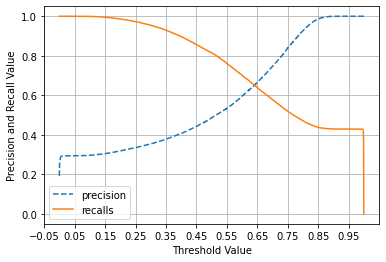

In [53]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr1.predict_proba(X_test)[:,1])

**Insights**
- After balancing the dataset, there is significant change observed in the precion and recall score for both of the classes.
- Precision score is .95 and .49 for full paid and charged off respectively.

# Tradeoff Questions

1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

    - `Answer` - Since data is imbalances by making the data balance we can try to avoid false positives. For evaluation metrics, we should be focusing on the macro average f1-score because we don't want to make false positive prediction and at the same we want to detect the defualers.
    
2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone
    - `Answer` - Below are the most features and their importance while making the prediction. So these variables can help the managers to identify which are customers who are more likely to pay the loan amount fully,

In [283]:
coefs = lr1.coef_.tolist()[0]
feature_coef_df = pd.DataFrame({'Variable': X.columns, 'Coeficient': coefs})
feature_coef_df.sort_values(by=['Coeficient'], ascending=False)

,Variable,Coeficient
35,zip_code_93700,14.024452
28,zip_code_11650,13.996881
34,zip_code_86630,13.885951
32,zip_code_48052,6.155181
33,zip_code_70466,6.131976
29,zip_code_22690,6.116895
31,zip_code_30723,6.102021
41,grade_G,1.402764
40,grade_F,1.370776
39,grade_E,1.315705


# Actional Insights and Recommendations

1. 80% of the customers have paid the loan fully.
2. 20% of the customers are the defaulters.
3. The organization can the trained model to make prediction for whether a person will likely to pay the loan amount or he will be a defaulter.
4. Model achieves the 94% f1-score for the negative class (Fully Paid).
5. Model achieves the 62% f1-score for the positive class (Charged off).
6. Cross Validation accuracy and testing accuracy is almost same which infers model is performing the decent job. We can trust this model for unseen data
7. By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.
8. ROC AUC curve area of 0.73, the model is correctly classifying about 73% of the instances. This is a good performance, but there is still room for improvement.
9. The precision-recall curve allows us to see how the precision and recall trade-off as we vary the threshold. A higher threshold will result in higher precision, but lower recall, and vice versa. The ideal point on the curve is the one that best meets the needs of the specific application.
10. After balancing the dataset, there is significant change observed in the precion and recall score for both of the classes.
11. Accuracy of Logistic Regression Classifier on test set: 0.891 which is decent and not by chance.